# Objectives for this mini project

1) Accessing database using python.
2) Interacting with Database API (DB-API), in this case is sqlite3, an SQL Database engine.
3) Utilise the likes of SQL magic (% and %% at the start of the code).
4) Analysing the data through matplotlib and seaborn to visualise.

### Import necessary libraries

In [11]:
import pandas as pd
import sqlite3

### Header is included
Jump straight into reading the Finance_data.csv file and display the first five rows of the data.

In [13]:
df = pd.read_csv('Finance_data.csv')
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


## Establish connection with the database
Prior to this step, feature selections and data engineering are not taken into account for this mini project.

In this case, SQLite3 will be connected and the dataframe will be converted into sql.

The SQL extension must be included to execute the SQL magic commands.

In [18]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [24]:
try:
    con = sqlite3.connect('finance.db')
    print('Connected to SQLite3')
    cur = con.cursor()

except sqlite3.Error as error:
    print("Failed to execute the above query", error)

Connected to SQLite3


In [25]:
%sql sqlite:///finance.db

'Connected: @finance.db'

## Store the dataframe into database
The table "my_portfolio_project_in_finance" will be created if the table doesn't exist in the database. If the table does exist, the record will be overwritten.

Select "False" to tell the system not to write the DataFrame index as a column.

In [28]:
df.to_sql("my_portfolio_project_in_finance",
          con,
          if_exists="replace",
          index=False,
          method="multi")

In [29]:
%sql SELECT * FROM my_portfolio_project_in_finance LIMIT 5

 * sqlite:///finance.db
Done.


gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,Stock_Marktet,Factor,Objective,Purpose,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
Female,34,Yes,1,2,5,3,7,6,4,Yes,Returns,Capital Appreciation,Wealth Creation,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
Female,23,Yes,4,3,2,1,5,6,7,No,Locking Period,Capital Appreciation,Wealth Creation,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
Male,30,Yes,3,6,4,2,5,1,7,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
Male,22,Yes,2,1,3,7,6,4,5,Yes,Returns,Income,Wealth Creation,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
Female,24,No,2,1,3,6,4,5,7,No,Returns,Income,Wealth Creation,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


### Retrieve the overview of all data in the dataframe
The data includes count, unique, mean, max, min, and etc.

In [33]:
df.describe(include="all")

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
count,40,40.000000,40,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40,40,40,40,40,40,40,40,40,40
unique,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,3,3,4,3,3,3,3,3,4
top,Male,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
freq,25,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,29,32,18,24,30,24,26,19,16
mean,NaN,27.800000,NaN,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.560467,NaN,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,21.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,25.750000,NaN,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,27.000000,NaN,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,30.000000,NaN,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Retrieve the overview of the column "Mutual_Funds" in the dataframe

In [34]:
df['Mutual_Funds'].describe()

count    40.000000
mean      2.550000
std       1.197219
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: Mutual_Funds, dtype: float64

## Example question for myself: 
Retrieve the highest number of mutual funds within the dataframe.

In [36]:
df['Mutual_Funds'].idxmax()

5

#### At the end of the day, the FIFTH index is apparently have the highest amount of mutual funds within the dataframe.

##### ** The first index starts from the first row of the data. The header will be ignored **

##### Let's retrieve the gender and age of that person, to see who exactly has the highest amount of mutual funds.

In [39]:
df.at[5, 'age']

24

## Visualise the data
For this, I will be analysing the relationship between the age and the purpose of doing sort of financing

 * sqlite:///finance.db
Done.


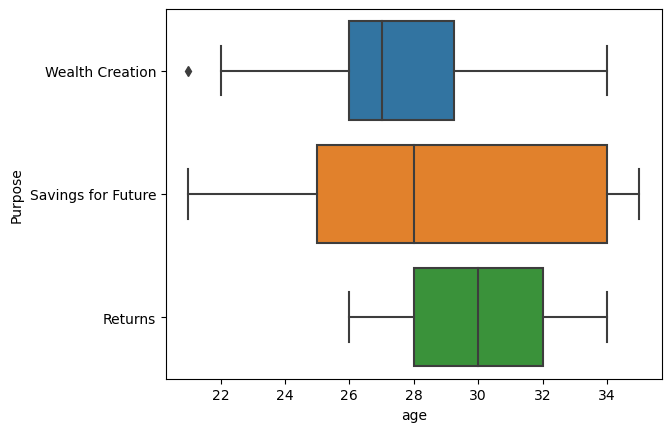

In [48]:
%matplotlib inline
import seaborn
info = %sql SELECT age, Purpose FROM my_portfolio_project_in_finance;
plot = seaborn.boxplot(x='age', y='Purpose', data=info.DataFrame())